Raices 
falsa posicion     biseccion     punto fijo     newton-Raphson     secante      secante modificado
0.000000           0.000000      1.000000       0.500000           0.612700     0.537263
0.612700           0.500000      0.367879       0.566311           0.563838     0.567010
0.572181           0.750000      0.692201       0.567143           0.567170     0.567143
0.567703           0.625000      0.500474       0.567143           0.567143     0.567143
0.567206           0.562500      0.606244       0.567143           0.567143     0.567143
0.567150           0.593750      0.545396       0.567143           0.567143     0.567143
0.567144           0.578125      0.579612       0.567143           0.567143     0.567143
0.567143           0.570312      0.560115       0.567143           0.567143     0.567143
0.567143           0.566406      0.571143       0.567143           0.567143     0.567143
0.567143           0.568359      0.564879       0.567143           0.567143     0.567143
0.5

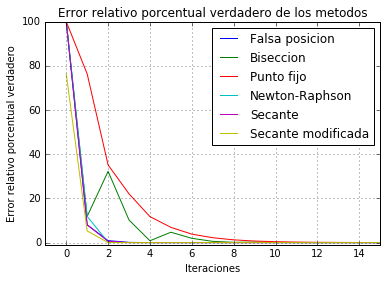

In [1]:
import matplotlib.pyplot as plt
import math
%matplotlib inline
valorexac,Xl,Xu,Xr,x =  0.56714329,0.0,1.0,0.0,0.0
Xl2,Xu2,Xr2,raiz3 = 0.0,1.0,0.0,0.0
Et1,Et2,Et3,Et4,Et5,Et6,iteraciones = [],[],[],[],[],[],[]
xsig,xant,xmasant,secm = 0.0,1.0,0.0,1.0

def evaluar(valor):
    fun = math.e**(-valor)-valor
    return fun

def falsaposicion(): 
    global Xr,Xu,Xl,Et1,raiz1
    Et1.append((abs(valorexac-Xr)/valorexac)*100)
    raiz1 = Xr
    Xr = Xu-(evaluar(Xu)*(Xl-Xu)/(evaluar(Xl)-evaluar(Xu)))
    fun1 = evaluar(Xl)
    fun2 = evaluar(Xr)
    if (fun1*fun2)<0:
        Xu = Xr
    if (fun1*fun2)>0:
        Xl = Xr

def biseccion():
    global Xr2,Xu2,Xl2,Et2,raiz2
    Et2.append((abs(valorexac-Xr2)/valorexac)*100)
    raiz2 = Xr2
    Xr2 =  (Xl2+Xu2)/2
    fun1 = evaluar(Xl2)
    fun2 = evaluar(Xr2)
    if (fun1*fun2)<0:
        Xu2 = Xr2
    if (fun1*fun2)>0:
        Xl2 = Xr2
        
def puntofijo():   
    global Et3,raiz3
    Et3.append((abs(valorexac-raiz3)/valorexac)*100)
    raiz3 = math.e**(-raiz3)
    
def newtonRaphson():
    global Et4,x 
    Et4.append((abs(valorexac-x)/valorexac)*100)
    x = x-(math.e**(-x)-x)/(-math.e**(-x)-1)

def secante():  
    global Et5,xsig,xant,xmasant
    Et5.append((abs(valorexac-xsig)/valorexac)*100)
    if ((math.e**(-xmasant)-xmasant)-(math.e**(-xant)-xant))!=0:
        xsig = xant-((math.e**(-xant)-xant)*(xmasant-xant))/((math.e**(-xmasant)-xmasant)-(math.e**(-xant)-xant))
    mostrarx = xsig
    xmasant = xant
    xant = xsig

def secantemodificado():
    global Et6,secm
    Et6.append((abs(valorexac-secm)/valorexac)*100)
    aux = secm*0.01
    secm = secm-((math.e**(-secm)-secm)*aux)/((math.e**(-(secm+aux))-(secm+aux))-(math.e**(-secm)-secm))

n=0    
print "Raices "
print "falsa posicion     biseccion     punto fijo     newton-Raphson     secante      secante modificado"
while n<30:
    falsaposicion()
    biseccion()
    puntofijo()
    newtonRaphson()
    secante()
    secantemodificado()
    print "%f           %f      %f       %f           %f     %f"%(raiz1,raiz2,raiz3,x,xsig,secm)
    iteraciones.append(n)
    n = n+1
    
plt.title ( "Error relativo porcentual verdadero de los metodos") 
plt.ylabel('Error relativo porcentual verdadero')
plt.xlabel('Iteraciones')
plt.plot(iteraciones, Et1, label = 'Falsa posicion')
plt.plot(iteraciones, Et2, label = 'Biseccion')
plt.plot(iteraciones, Et3, label = 'Punto fijo')
plt.plot(iteraciones, Et4, label = 'Newton-Raphson')
plt.plot(iteraciones, Et5, label = 'Secante')
plt.plot(iteraciones, Et6, label = 'Secante modificada')
plt.axis([-1, 15, -1, 100])   
plt.legend() 
plt.grid(True)
plt.show()
